# Load packages

In [53]:
library(tidyverse)
library(broom)
library(AICcmodavg)
# for descriptive analysis
library(psych)
library(vcd)
library(reshape2)
library(sparcl)
library(factoextra)
library(NbClust)
library(ggplot2)
library(corrplot)
library(gridExtra)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




# Import data

In [16]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)


In [17]:

# specifying the path
path <- "C:\\Users\\fatim\\OneDrive\\Documents\\PreScreen_r3_pw - 1234\\PreScreen_r3\\ingredient.csv"
 
# reading contents of csv file
content <- read.csv(path)

In [18]:
df <- data.frame(content)

## Question 1a: Descriptive analysis of the additives

In [19]:
# contents of the csv file
head(df)

,a,b,c,d,e,f,g,h,i
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
2,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
3,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
4,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
5,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
6,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00


In [20]:
# Get the shape of the dataframe
dim(df)

[1] 214   9

In [21]:
# Check for NaN 
sum(is.na(df))

# The data has no missing NaN

[1] 0

In [22]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,1,214,1.51836542,0.003036864,1.51768,1.51801192,0.001875489,1.51115,1.53393,0.02278,1.6027151,4.7167266,0.0002075957
b,2,214,13.40785047,0.816603556,13.30000,13.37680233,0.644931000,10.73000,17.38000,6.65000,0.4478343,2.8979666,0.0558218699
c,3,214,2.68453271,1.442407845,3.48000,2.86552326,0.303933000,0.00000,4.49000,4.49000,-1.1364523,-0.4526762,0.0986009704
d,4,214,1.44490654,0.499269646,1.36000,1.41220930,0.311346000,0.29000,3.50000,3.21000,0.8946104,1.9383534,0.0341293704
e,5,214,72.65093458,0.774545795,72.79000,72.70732558,0.570801000,69.81000,75.41000,5.60000,-0.7202392,2.8163627,0.0529468605
f,6,214,0.49705607,0.652191846,0.55500,0.43180233,0.170499000,0.00000,6.21000,6.21000,6.4600889,52.8665268,0.0445829167
g,7,214,8.95696262,1.423153487,8.60000,8.74215116,0.659757000,5.43000,16.19000,10.76000,2.0184463,6.4104000,0.0972847696
h,8,214,0.17504673,0.497219261,0.00000,0.03377907,0.000000000,0.00000,3.15000,3.15000,3.3686800,12.0801412,0.0339892089
i,9,214,0.05700935,0.097438701,0.00000,0.03581395,0.000000000,0.00000,0.51000,0.51000,1.7298107,2.5203615,0.0066607725


The descriptive table below clearly indicates that the additives are different.

They have different statistical properties(from mean to the standard error).

Both the standard deviation and median absolute deviation are reasonable low. This suggests the little variability in the measurement of the additives(no large swing in measurement).

However, the skew and kurtosis test suggests most of the additives are not normally distributed and are heavy tailed. Only additives b and d conforms to normality and symmetry(skew is ~ 0 and kurtosis is less than 3). This suggests that most of the variables needs to be normalized before applying statistical methods that assume normal distribution.

In [23]:
cor(df,method=c("spearman"))

,a,b,c,d,e,f,g,h,i
a,1.00000000,0.03103967,0.14415586,-0.49182146,-0.5257328903,-0.2880012622,0.703777290,-0.181511060,0.096181052
b,0.03103967,1.00000000,-0.12645115,0.13590989,-0.2656433354,-0.5845034843,0.027204932,0.411111434,-0.217631126
c,0.14415586,-0.12645115,1.00000000,-0.51241978,-0.3368114109,0.2007417523,-0.289119047,-0.456107387,0.095487450
d,-0.49182146,0.13590989,-0.51241978,1.00000000,0.1965133676,0.1534377609,-0.280951722,0.474564245,-0.076313436
e,-0.52573289,-0.26564334,-0.33681141,0.19651337,1.0000000000,-0.0007188565,-0.221911722,0.170212354,-0.071994663
f,-0.28800126,-0.58450348,0.20074175,0.15343776,-0.0007188565,1.0000000000,-0.472703394,-0.260405690,0.091902832
g,0.70377729,0.02720493,-0.28911905,-0.28095172,-0.2219117222,-0.4727033935,1.000000000,-0.007770469,0.111896658
h,-0.18151106,0.41111143,-0.45610739,0.47456424,0.1702123538,-0.2604056903,-0.007770469,1.000000000,0.009680079
i,0.09618105,-0.21763113,0.09548745,-0.07631344,-0.0719946629,0.0919028320,0.111896658,0.009680079,1.000000000


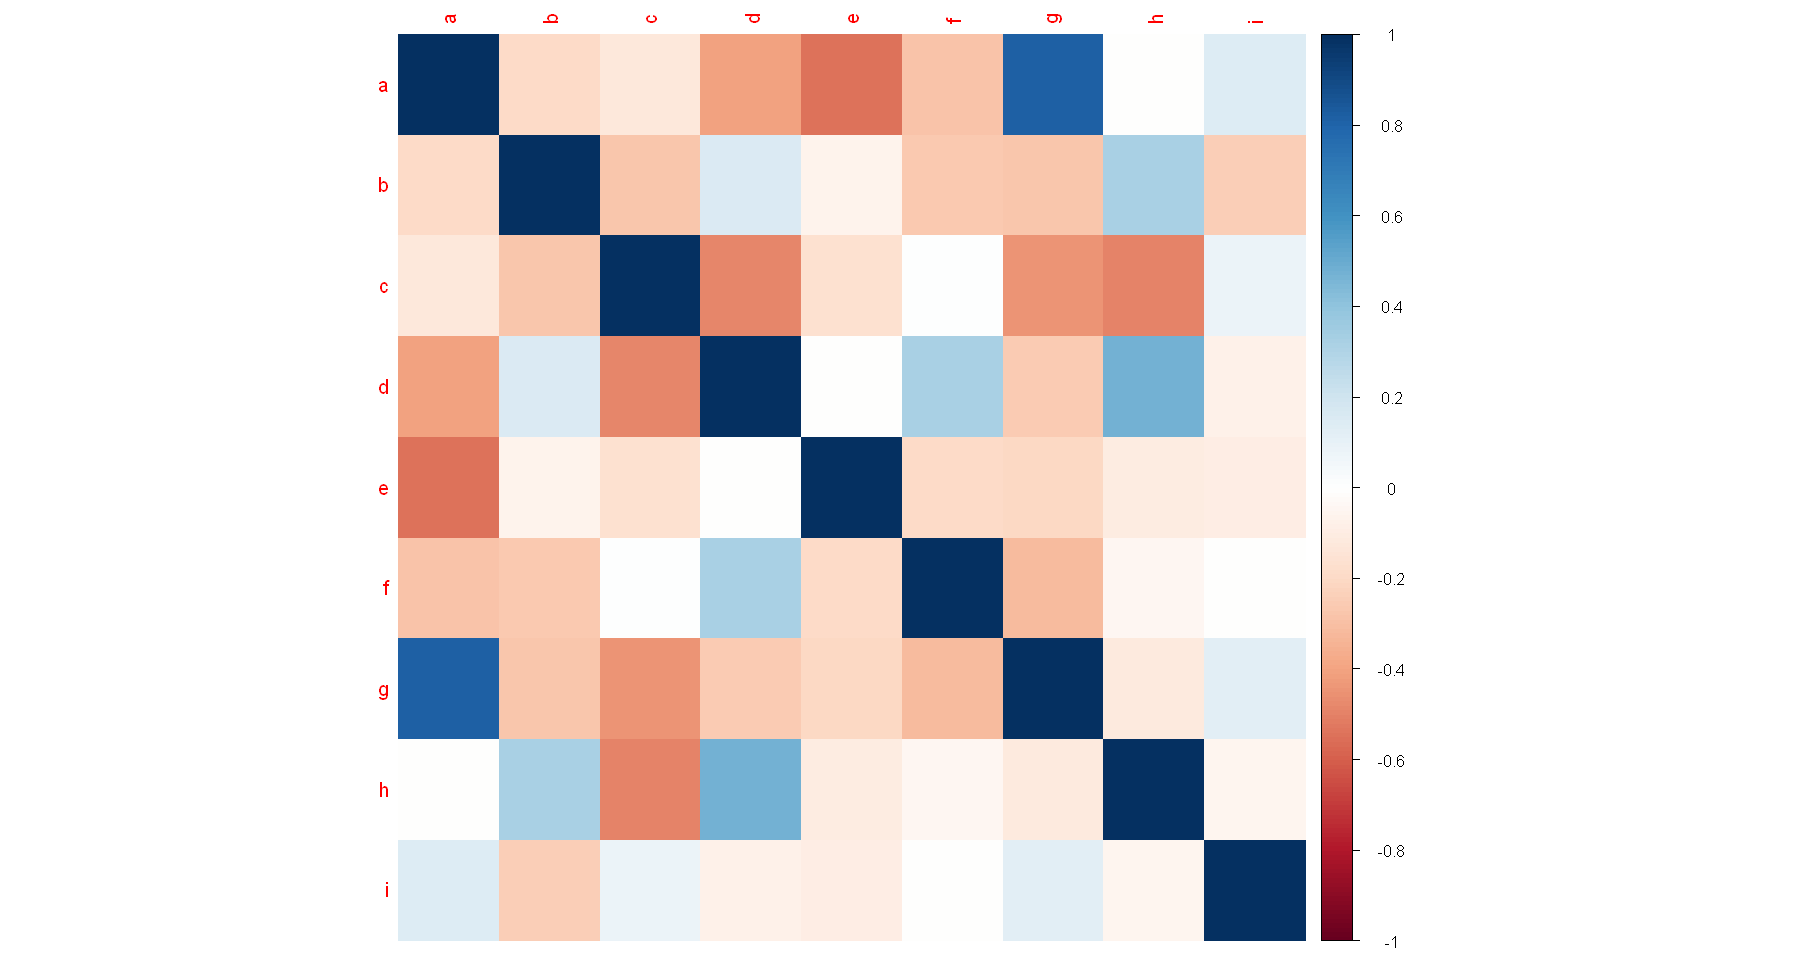

In [26]:
corrplot(cor(df), method = 'color')

Only additives a and g shows any strong positive correlation; while there is noticeable negative correlation between additives a and e.

Overall, the correlation matrices and descriptive analysis suggest significant differences between the additives.

The use of the ANOVA test is not encouraged given the lack of clear dependent variable to measure.

## Question 1b: Graphical Analysis

Graphical analysis of the additives:

In [48]:
class(df)

[1] "data.frame"

In [27]:
dataM <- melt(df)

No id variables; using all as measure variables



In [28]:
tail(dataM)

,variable,value
,<fct>,<dbl>
1921,i,0.00
1922,i,0.16
1923,i,0.32
1924,i,0.00
1925,i,0.22
1926,i,0.00


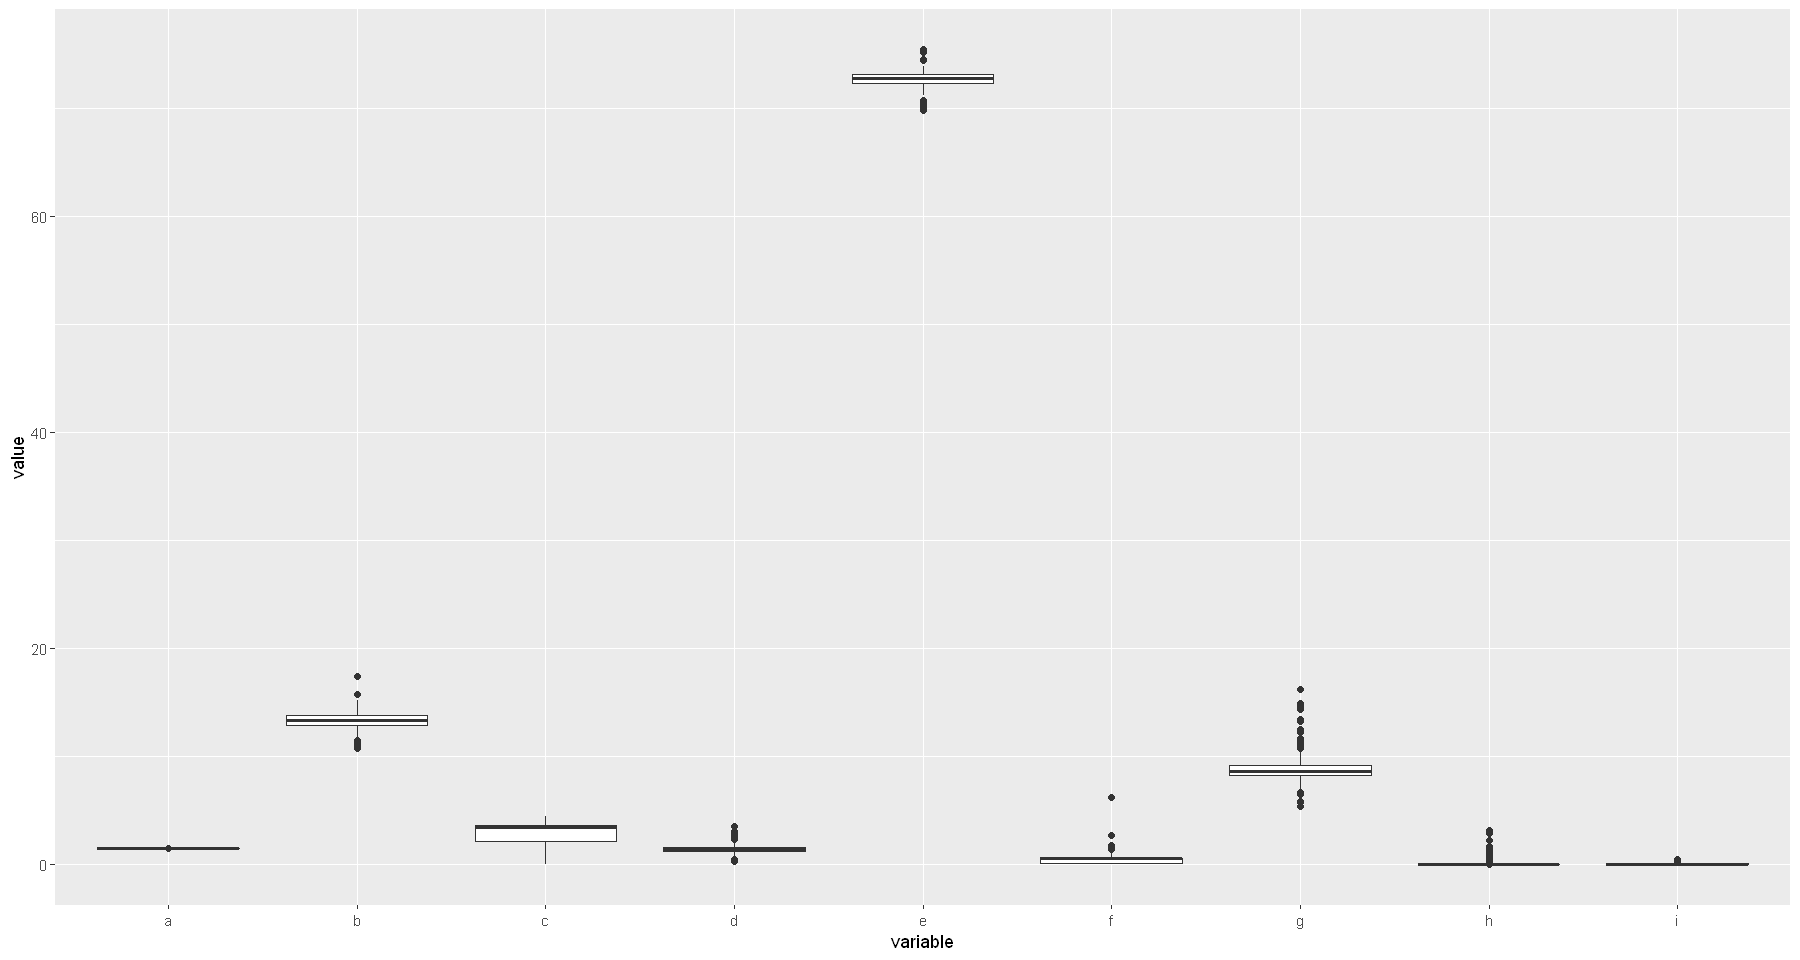

In [45]:
# Boxplots
ggplot(dataM,aes(x = variable,y = value)) + geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



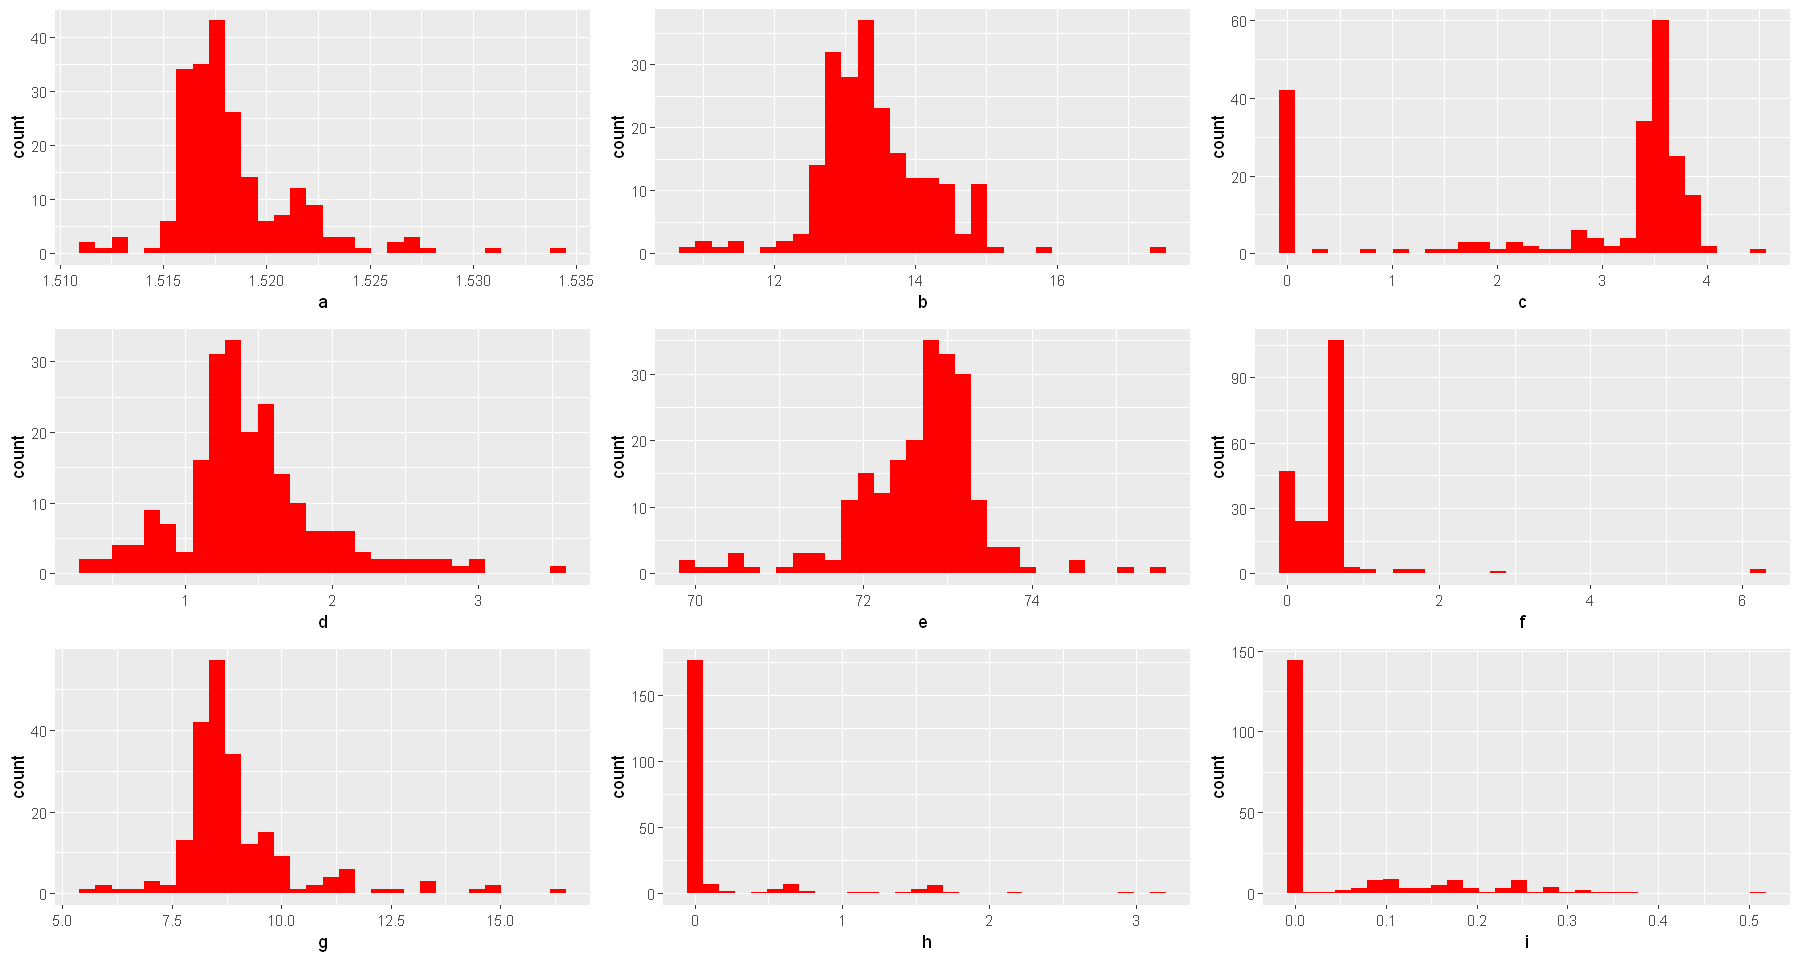

In [55]:
# Histogram
plot1 <- ggplot(df,aes(x=a)) + geom_histogram(fill='red')

plot2 <- ggplot(df,aes(x=b)) + geom_histogram(fill='red')

plot3 <- ggplot(df,aes(x=c)) + geom_histogram(fill='red')

plot4 <- ggplot(df,aes(x=d)) + geom_histogram(fill='red')

plot5 <- ggplot(df,aes(x=e)) + geom_histogram(fill='red')

plot6 <- ggplot(df,aes(x=f)) + geom_histogram(fill='red')

plot7 <- ggplot(df,aes(x=g)) + geom_histogram(fill='red')

plot8 <- ggplot(df,aes(x=h)) + geom_histogram(fill='red')

plot9 <- ggplot(df,aes(x=i)) + geom_histogram(fill='red')

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, ncol=3, nrow=3)

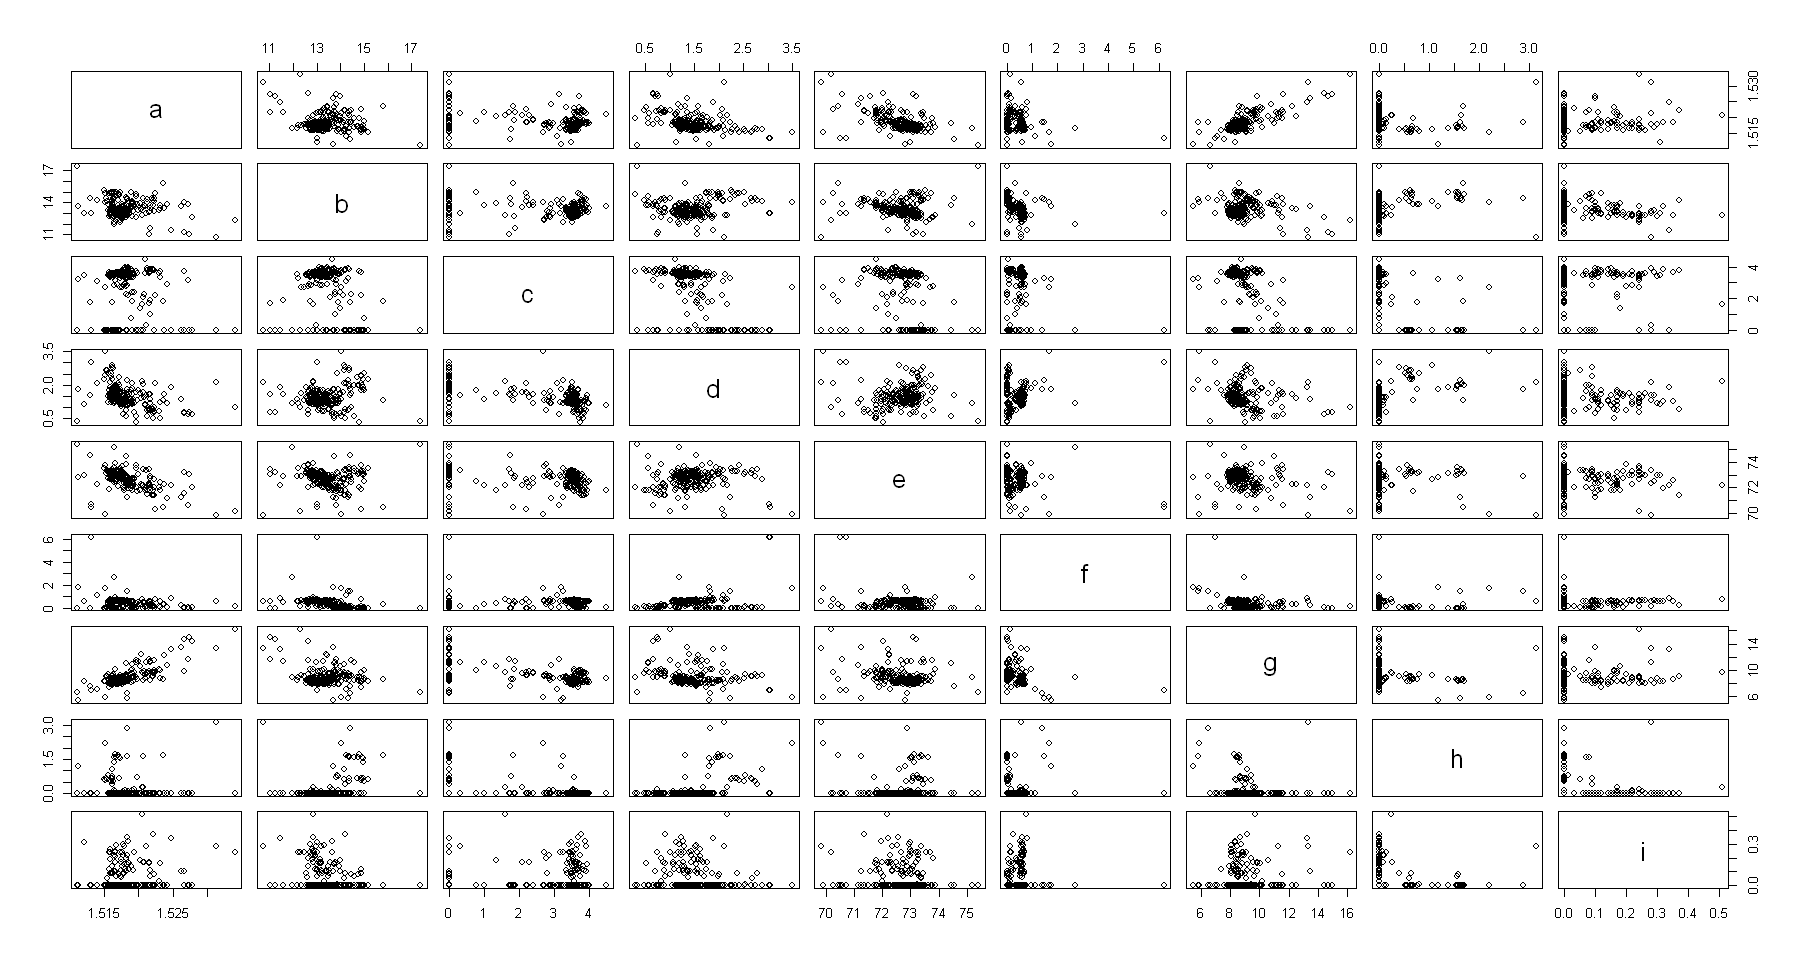

In [46]:
# Scatterplots
pairs(df[, c('a','b','c','d','e','f','g','h','i')])

## Conclusion for the Graphical Analysis:

   1. Additive e is fairly normally distributed when compared to other additives.
   2. The box plot alos confirmed the nearness in the distribution of the additives, with little to no outliers.
    And there is a strong positive correlation between additive g and a(as g increases so does a); while other variables like d&a, e&a, d&c, g&c and c&h shows a negative correlation(an increase in one leads to decrease in other)



## Question 1c: Unsupervised learning

In [100]:
## Scale the data to apply machine learning
scaled_data<-as.data.frame(scale(df))

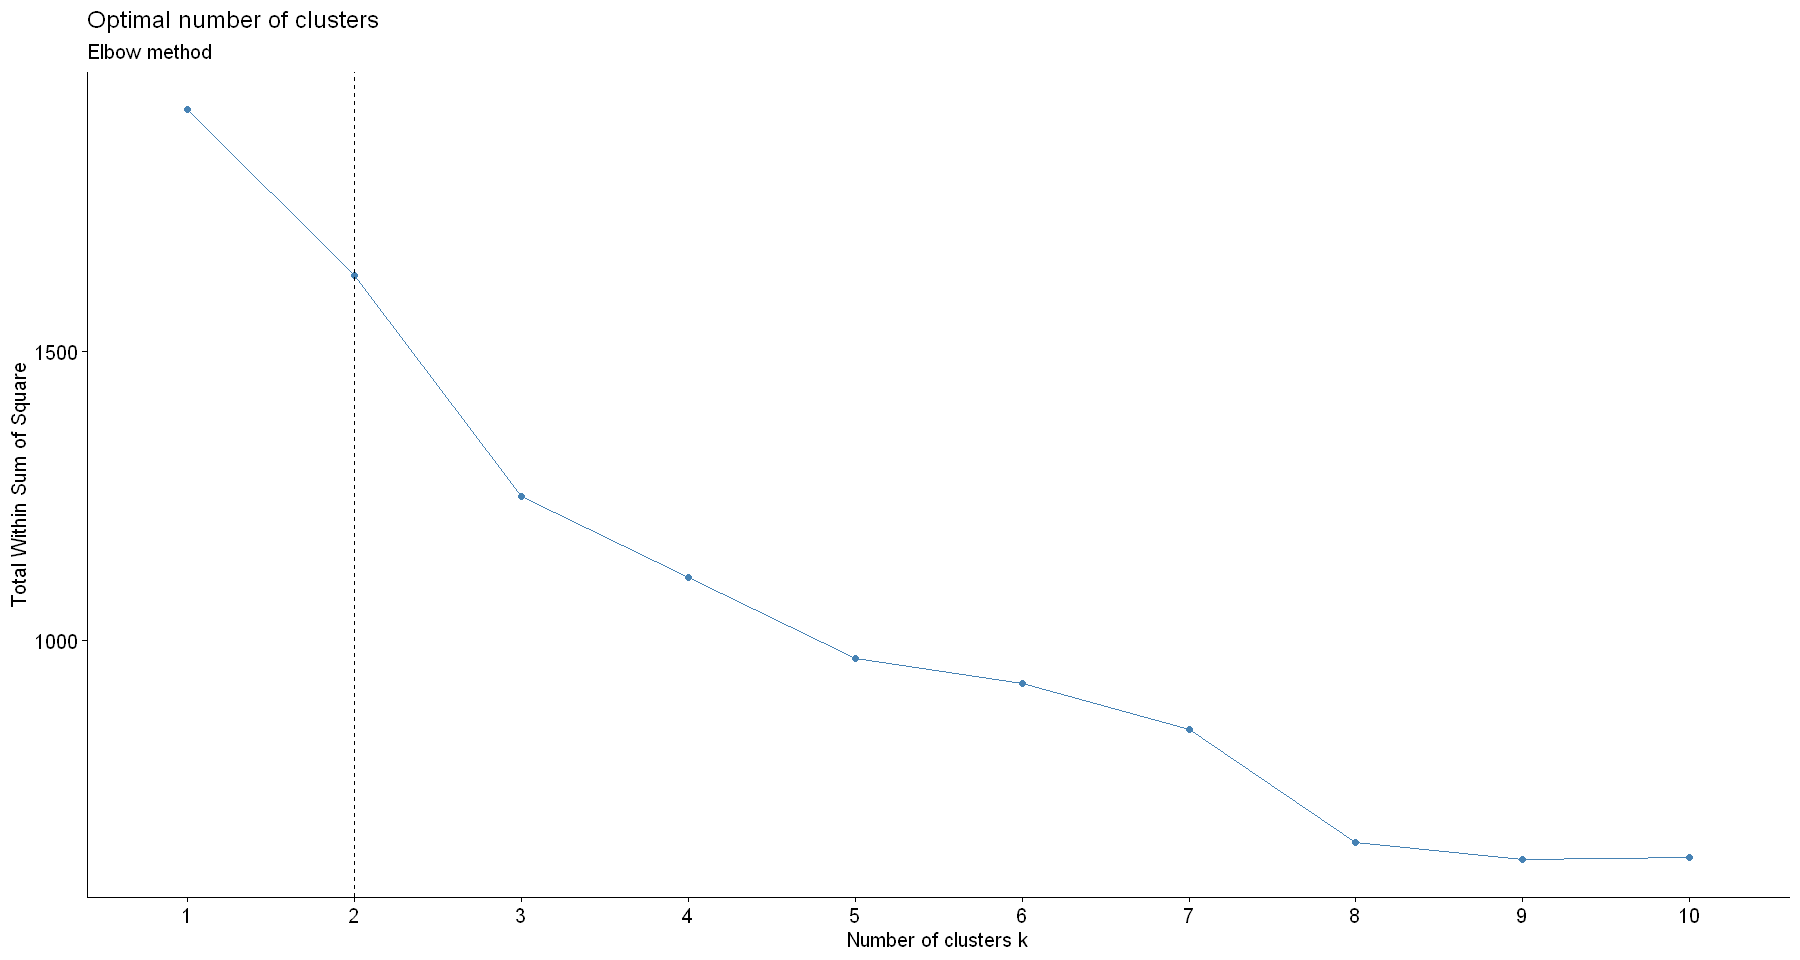

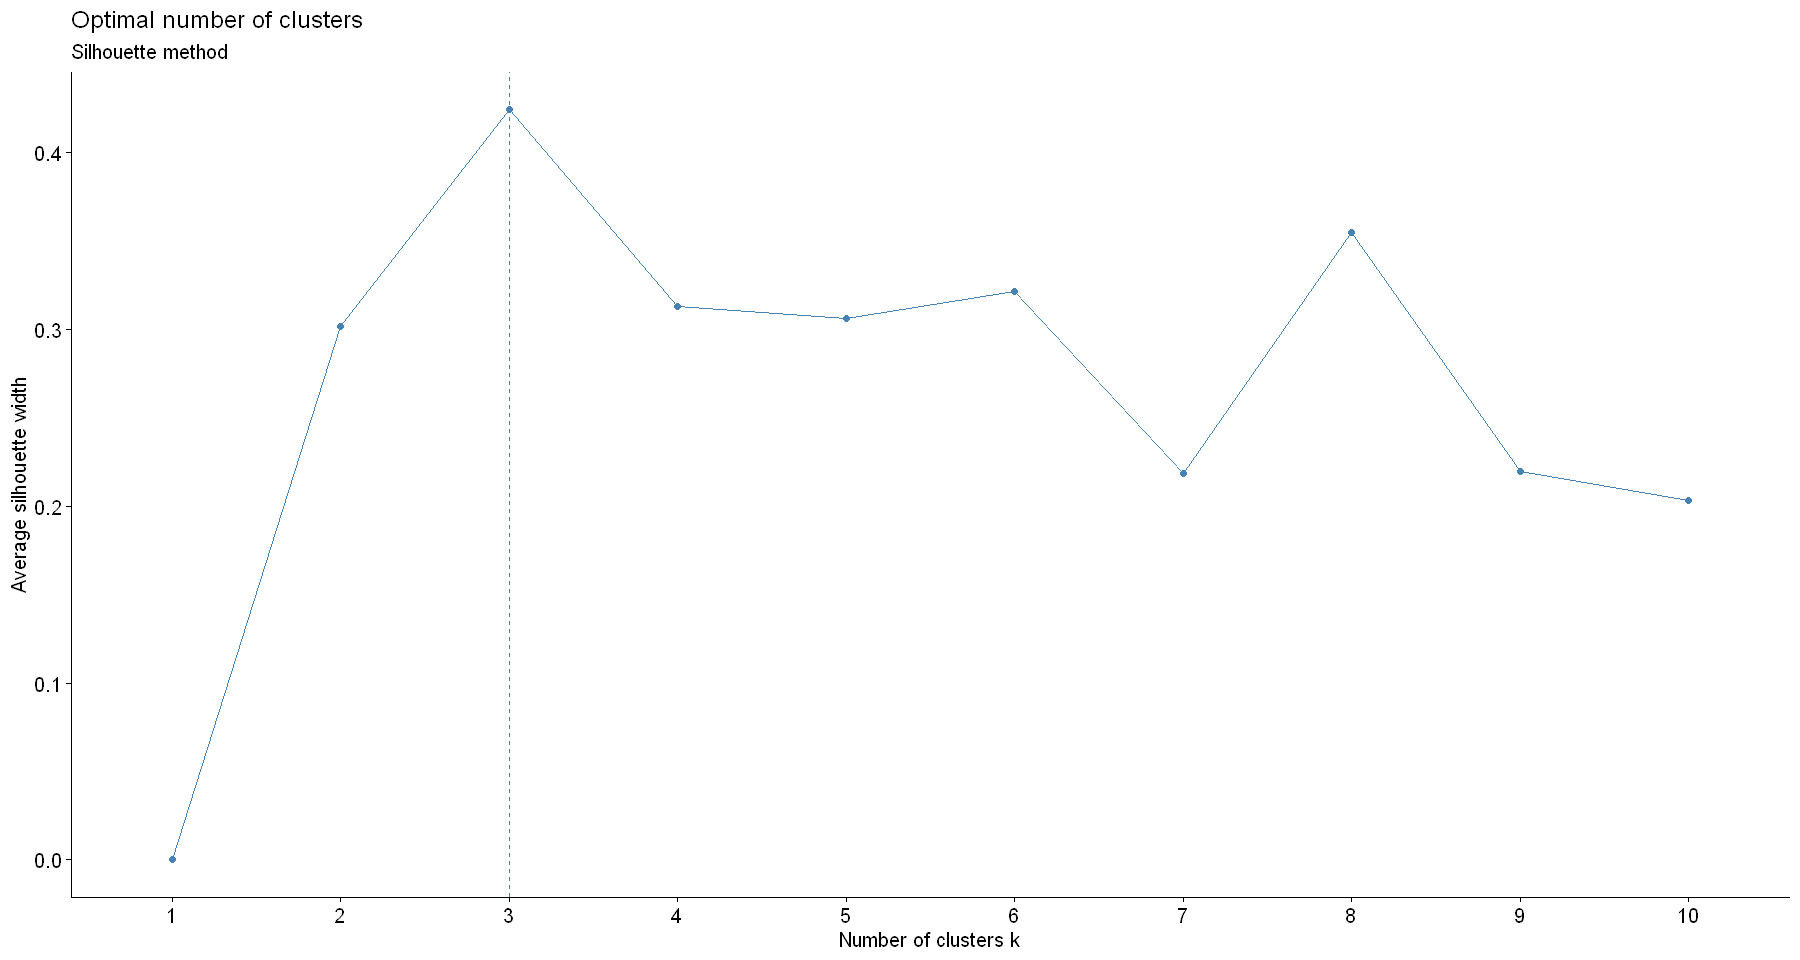

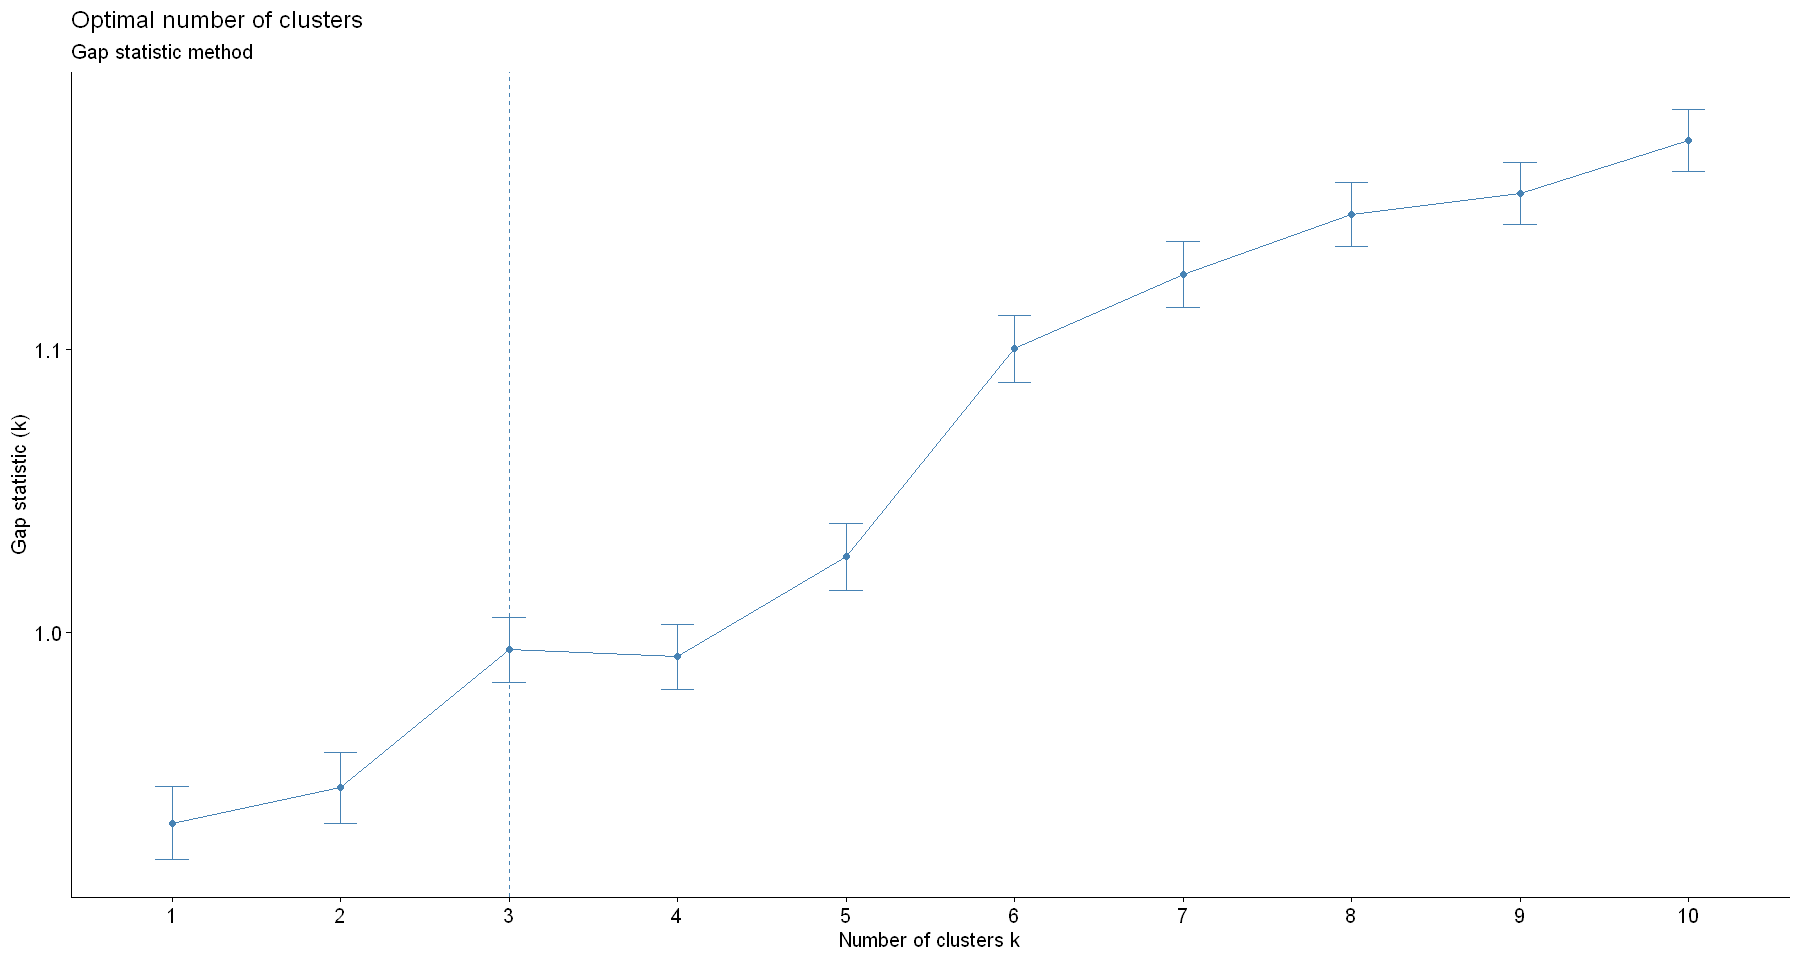

In [107]:
# Get the initial cluster size
# Elbow method
fviz_nbclust(scaled_data, kmeans, method = "wss") +
  geom_vline(xintercept = 2, linetype = 2)+
  labs(subtitle = "Elbow method")
# Silhouette method
fviz_nbclust(scaled_data, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")
# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(scaled_data, kmeans, nstart = 25,  method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method")

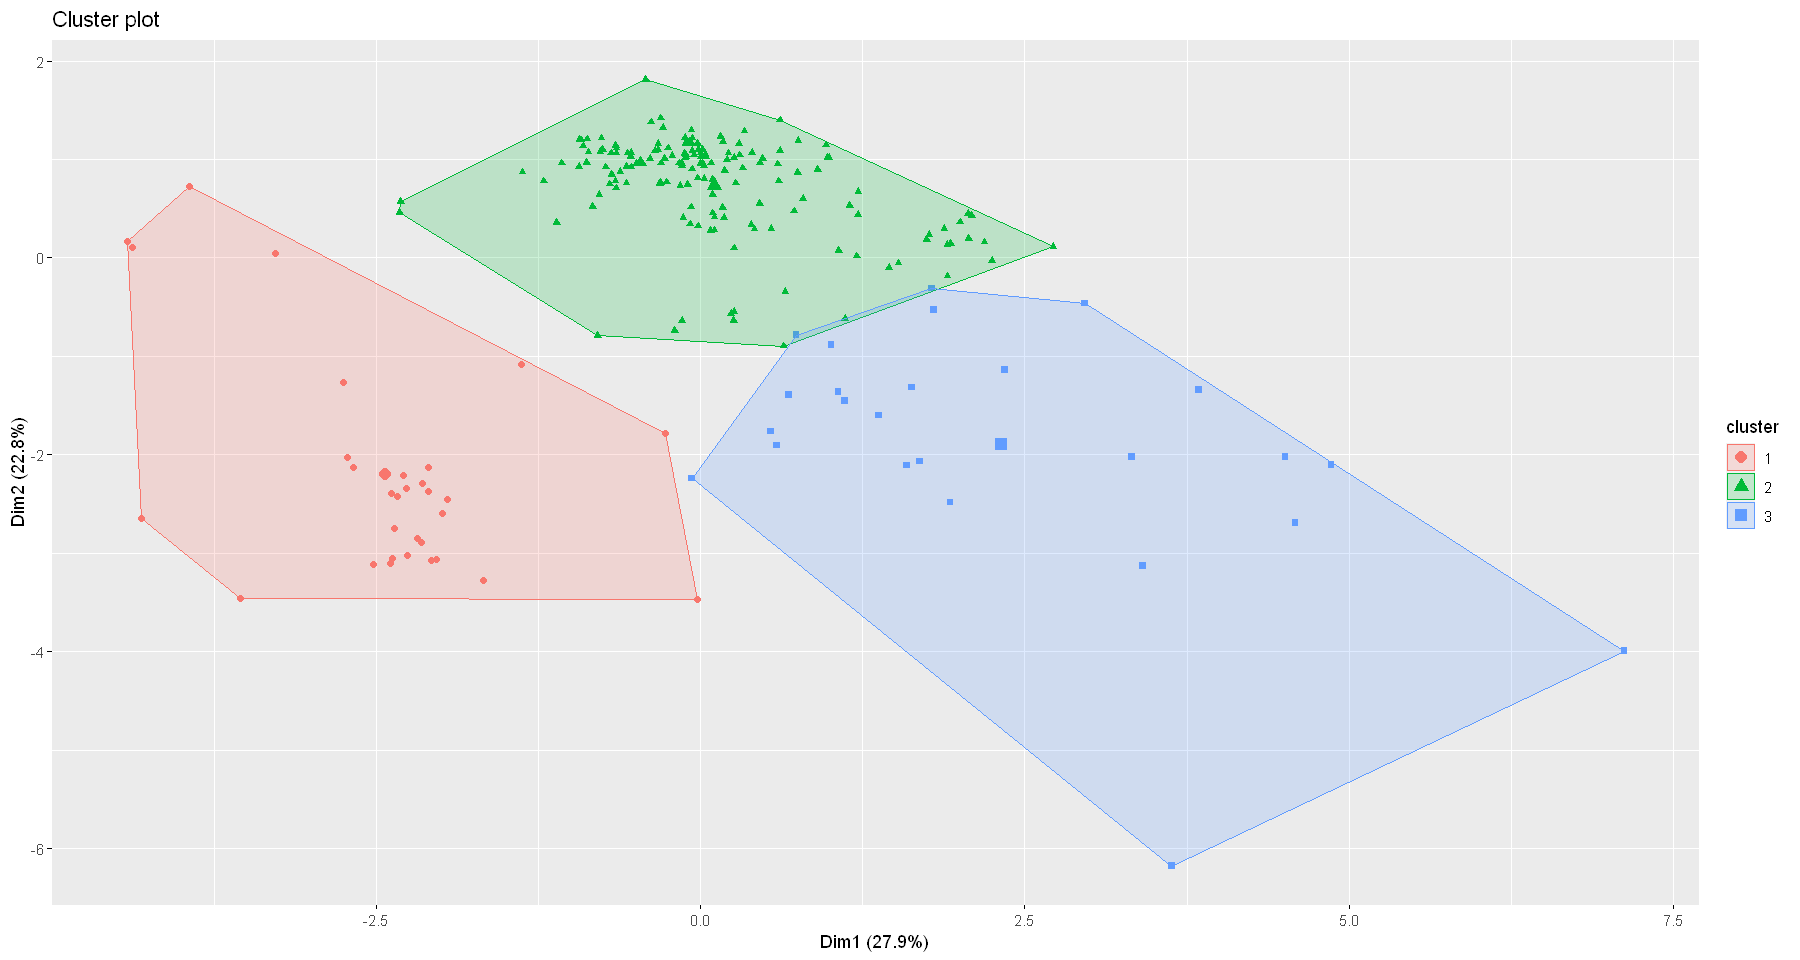

In [105]:
fviz_cluster(kmeans(scaled_data, centers = 3), geom = "point", data = scaled_data)

There are three distinct clusters from the dataset.